## **Predicting Number of Claps Using NLP**
### **Project of Module: Advanced Data Analytics for Management Support SS2020**


*Abstract* - Medium is a online publishing platform, where posts can be viewed and commented by all internet users. In this project, one mean of quantified feedback - number of claps will be predicted based on the text-based content. Since the target value is continious, a regression model will be used. A simple linear regression model was used as benchmark and then followed by a neural network model using GRU. The prediction accuracy is measured as mean square error concerning the regression model. And result shows that a neural netword model has improved MSE by 58.4%

*keywords* prediction, neural network, social media, NLP

### **Introduction**

Although social media are nowadays mostly bonded with mobile devices, social media websites still have big scale of users for longer contents or more complicated topics. Since social media not only serve as a place connecting family and friends but also a source of information. As for our target data source MEDIUM, it also specify the time need to be consumed in reading the whole article. There are multiple measures to evaluate if an article is popular, such as how many people have followed the author, how many comments and out target variable: number of claps.


There are many related work that have done similiar research to predict social media popularity, varying from number of 'likes' and 'retweets'[1][2], in sentiment analysis it is defined as positive/negative[3]. De Freitas has predicted popularity of social media(number of likes on Twitter) article by it's title. He has used multiple classification tools like support vector machines(SVM), decision tree, gaussian naive Bayes and so on in the multinominal NB model to make the prediction. Zamorano has used mixed input: text and images to improve model performance compared to the XGBoost Regression model. His target variable is the ration of likes to the average likes. Afham meanwhile has used NLTK library for sentiment analysis of posts on Twitter.

### **Problem Statement**

In this project, it is to predict a continious numeric variable: number of claps for an article on the median plattform - MEDIUM. The raw data for training contains various data forms, such as the raw text of the article, tags, title, published date, authors' personal information. Data structure is dataframe. While the data sets for model prediction contain different information as the training set. Many varible is also difined differently as in the training set. So the first problem is to select suitable variable for modeling and making sure that the variables are not only in the same data structure but also defined in the same way.
The second chanllange in this project is that, our target variable is a continious numeric varible. So that it is important to choose a suitable model for that.

### **Evaluation Metrics**

How to compare the solution model to the benchmark model need to be quantified. Due to the numeric character of out target variable, mean squared error(MSE) is chosed as the only evaluation metrics. \
$ MSE = \frac{1}{n}\Sigma(y_{i} -\hat{y})^2 $\
In order to keep the scale of MSE to be the same, the portion for validation in each model need to be kept the same. So that this evaluation metrics can rule out the effect of systematical deviation.

## **1. Data Preprocessing**

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings

# settings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
import collections

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import pickle
from bs4 import BeautifulSoup
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
from gensim.models import KeyedVectors
from gensim.models.keyedvectors import Word2VecKeyedVectors

In [ ]:
df = pd.read_csv("/content/drive/My Drive/ADAMS_NLPtask_SS20-2/Train.csv")
df.shape

(279577, 50)

In [ ]:
df.head()

,audioVersionDurationSec,codeBlock,codeBlockCount,collectionId,createdDate,createdDatetime,firstPublishedDate,firstPublishedDatetime,imageCount,isSubscriptionLocked,language,latestPublishedDate,latestPublishedDatetime,linksCount,postId,readingTime,recommends,responsesCreatedCount,socialRecommendsCount,subTitle,tagsCount,text,title,totalClapCount,uniqueSlug,updatedDate,updatedDatetime,url,vote,wordCount,publicationdescription,publicationdomain,publicationfacebookPageName,publicationfollowerCount,publicationname,publicationpublicEmail,publicationslug,publicationtags,publicationtwitterUsername,tag_name,slug,name,postCount,author,bio,userId,userName,usersFollowedByCount,usersFollowedCount,scrappedDate
0,0,NaN,0.0,638f418c8464,2018-09-18,2018-09-18 20:55:34,2018-09-18,2018-09-18 20:57:03,1,False,en,2018-09-18,2018-09-18 20:58:20,1,10007d3018fe,0.958491,2,0,0,A major private IT company implements blockcha...,5,"Private Business, Government and Blockchain\n\...","Private Business, Government and Blockchain",100,private-business-government-and-blockchain-100...,2018-09-18,2018-09-18 20:58:20,https://medium.com/s/story/private-business-go...,False,201,ICOBox is the first and the biggest new genera...,NaN,icobox.io,NaN,ICOBox,support@icobox.io,icobox-io,"BLOCKCHAIN,ICO,ETHEREUM,ETHEREUM BLOCKCHAIN,TO...",icobox_io,Blockchain,blockchain,Blockchain,265164.0,Anar Babaev,NaN,f1ad85af0169,babaevanar,450.0,404.0,20181104
1,0,NaN,0.0,638f418c8464,2018-09-18,2018-09-18 20:55:34,2018-09-18,2018-09-18 20:57:03,1,False,en,2018-09-18,2018-09-18 20:58:20,1,10007d3018fe,0.958491,2,0,0,A major private IT company implements blockcha...,5,"Private Business, Government and Blockchain\n\...","Private Business, Government and Blockchain",100,private-business-government-and-blockchain-100...,2018-09-18,2018-09-18 20:58:20,https://medium.com/s/story/private-business-go...,False,201,ICOBox is the first and the biggest new genera...,NaN,icobox.io,NaN,ICOBox,support@icobox.io,icobox-io,"BLOCKCHAIN,ICO,ETHEREUM,ETHEREUM BLOCKCHAIN,TO...",icobox_io,Samsung,samsung,Samsung,5708.0,Anar Babaev,NaN,f1ad85af0169,babaevanar,450.0,404.0,20181104
2,0,NaN,0.0,638f418c8464,2018-09-18,2018-09-18 20:55:34,2018-09-18,2018-09-18 20:57:03,1,False,en,2018-09-18,2018-09-18 20:58:20,1,10007d3018fe,0.958491,2,0,0,A major private IT company implements blockcha...,5,"Private Business, Government and Blockchain\n\...","Private Business, Government and Blockchain",100,private-business-government-and-blockchain-100...,2018-09-18,2018-09-18 20:58:20,https://medium.com/s/story/private-business-go...,False,201,ICOBox is the first and the biggest new genera...,NaN,icobox.io,NaN,ICOBox,support@icobox.io,icobox-io,"BLOCKCHAIN,ICO,ETHEREUM,ETHEREUM BLOCKCHAIN,TO...",icobox_io,It,it,It,3720.0,Anar Babaev,NaN,f1ad85af0169,babaevanar,450.0,404.0,20181104
3,0,NaN,0.0,NaN,2018-01-07,2018-01-07 17:04:37,2018-01-07,2018-01-07 17:06:29,13,False,en,2018-01-07,2018-01-07 17:18:38,24,1000c43bcb97,19.716981,0,0,0,Introduction,5,EPQ draft 1 (4844 words)\nhttps://upload.wikim...,EPQ draft 1 (4844 words),0,introduction-3-1000c43bcb97,2018-01-07,2018-01-07 17:18:39,https://medium.com/s/story/introduction-3-1000...,False,4854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Technology,technology,Technology,166125.0,George Sykes,NaN,93b9e94f08ca,tasty231,6.0,22.0,20181104
4,0,NaN,0.0,NaN,2018-01-07,2018-01-07 17:04:37,2018-01-07,2018-01-07 17:06:29,13,False,en,2018-01-07,2018-01-07 17:18:38,24,1000c43bcb97,19.716981,0,0,0,Introduction,5,EPQ draft 1 (4844 words)\nhttps://upload.wikim...,EPQ draft 1 (4844 words),0,introduction-3-1000c43bcb97,2018-01-07,2018-01-07 17:18:39,https://medium.com/s/story/introduction-3-1000...,False,4854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robotics,robotics,Robotics,9103.0,George Sykes,NaN,93b9e94f08ca,tasty231,6.0,22.0,20181104


In [ ]:
test = pd.read_csv("/content/drive/My Drive/ADAMS_NLPtask_SS20-2/Test.csv")
test.shape 

(514, 8)

In [ ]:
test.head()

,Unnamed: 0,index,Author,PublicationDetails,Responses,Header,Text,Length
0,0,0,Daniel Jeffries,"Daniel Jeffries in HackerNoon.comJul 31, 2017",627 responses,Why Everyone Missed the Most Mind-Blowing Feat...,There’s one incredible feature of cryptocurren...,23401
1,1,1,Noam Levenson,"Noam Levenson in HackerNoon.comDec 6, 2017",156 responses,NEO versus Ethereum: Why NEO might be 2018’s s...,"<img class=""progressiveMedia-noscript js-progr...",23972
2,2,2,Daniel Jeffries,"Daniel Jeffries in HackerNoon.comJul 21, 2017",176 responses,The Cryptocurrency Trading Bible,So you want to trade cryptocurrency?You’ve see...,402
3,3,5,Haseeb Qureshi,"Haseeb Qureshi in HackerNoon.comFeb 19, 2018",72 responses,Stablecoins: designing a price-stable cryptocu...,A useful currency should be a medium of exchan...,19730
4,4,7,William Belk,"William Belk in HackerNoon.comJan 28, 2018",19 responses,Chaos vs. Order — The Cryptocurrency Dilemma,Crypto crypto crypto crypto. It’s here. It’s h...,5324


In [ ]:
pd.set_option('display.max_colwidth', None)
print(test.loc[0, ['Length']])
cell_text1 = str(test.loc[0, ['Text']])
words = cell_text1.split()
print(words)
len1 = len(words)
print(str(len1))
#'Length' variable in test data sets does not equal to the number of words in 'Text' variable

Length    23401
Name: 0, dtype: object
['Text', 'There’s', 'one', 'incredible', 'feature', 'of', 'cryptocurrencies', 'that', 'almost', 'everyone', 'seems', 'to', 'have', 'missed,', 'including', 'Satoshi', 'himself.But', 'it’s', 'there,', 'hidden', 'away,', 'steadily', 'gathering', 'power', 'like', 'a', 'hurricane', 'far', 'out', 'to', 'sea', 'that’s', 'sweeping', 'towards', 'the', 'shore.It’s', 'a', 'stealth', 'feature,', 'one', 'that', 'hasn’t', 'activated', 'yet.But', 'when', 'it', 'does', 'it', 'will', 'ripple', 'across', 'the', 'entire', 'world,', 'remaking', 'every', 'aspect', 'of', 'society.To', 'understand', 'why,', 'you', 'just', 'have', 'to', 'understand', 'a', 'little', 'about', 'the', 'history', 'of', 'money.The', 'Ascent', 'of', 'MoneyMoney', 'is', 'power.Nobody', 'knew', 'this', 'better', 'than', 'the', 'kings', 'of', 'the', 'ancient', 'world.', 'That’s', 'why', 'they', 'gave', 'themselves', 'an', 'absolute', 'monopoly', 'on', 'minting', 'moolah.They', 'turned', 'shiny', '

### **1.1 Selecting Columns**###
The first part of the data processing is to clean the data set.
In the first step, variables: 'language', 'responsesCreatedCount','text', 'totalClapCount' in training data set are selected because the other variables are either not clearly defined or do not have corresponding variables in test data set; while only variables 'Text', 'Responses' in test data will be taken into consideration. Then in the second step duplictated data points in training data will be removed, this is due to the articles have multiple tags and each tag has a separate data point.

In [ ]:
train = df[['language', 'text', 'responsesCreatedCount', 'totalClapCount']]
train.head()

,language,text,responsesCreatedCount,totalClapCount
0,en,"Private Business, Government and Blockchain\n\...",0,100
1,en,"Private Business, Government and Blockchain\n\...",0,100
2,en,"Private Business, Government and Blockchain\n\...",0,100
3,en,EPQ draft 1 (4844 words)\nhttps://upload.wikim...,0,0
4,en,EPQ draft 1 (4844 words)\nhttps://upload.wikim...,0,0


In [ ]:
train = train.drop_duplicates()
train.shape 

(72195, 4)

A new feature 'text_length' is created with a lambda funtion because the original variable for the length of article indicate the number of digits instead of words. For the sake of our later analysis on the words, it is better to create a new feature based on the number of words in each article.

In [ ]:
train['text_length'] = train.text.apply(lambda x : len(x.split()))#create new feature from 'text'
train.head()

,language,text,responsesCreatedCount,totalClapCount,text_length
0,en,"Private Business, Government and Blockchain\n\...",0,100,192
3,en,EPQ draft 1 (4844 words)\nhttps://upload.wikim...,0,0,4751
7,en,"Ascent of data Science, SAS and Big data Analy...",0,0,533
11,en,Can a robot love us better than another human ...,0,50,173
16,en,"2017 Big Data, AI and IOT Use Cases\nAn Active...",0,27,1762


In [ ]:
import matplotlib.pyplot as plt
plt.plot('text_length', data = train)
#the most of 'text' have a length from 0 to 5000

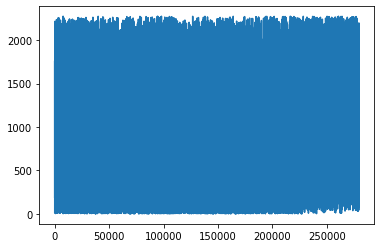

In [ ]:
train2 = train[train.text_length < np.percentile(train.text_length,95)]
#remove outliers of extrem long 'text_length'
plt.plot('text_length', data = train2)

In [ ]:
test = test[['index', 'Responses', 'Text']]
test.rename(columns={'Text':'text','Responses':'response'}, inplace=True)#change column name of test data sets in order to be consistant with train data
test.head()

,index,response,text
0,0,627 responses,There’s one incredible feature of cryptocurren...
1,1,156 responses,"<img class=""progressiveMedia-noscript js-progr..."
2,2,176 responses,So you want to trade cryptocurrency?You’ve see...
3,5,72 responses,A useful currency should be a medium of exchan...
4,7,19 responses,Crypto crypto crypto crypto. It’s here. It’s h...


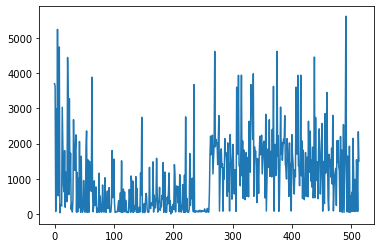

In [ ]:
plt.plot('text_length', data = test) #the distribution of 'text_length' is from 0-3000, which is much shorter to train data

In [ ]:
test['text_length'] = test.text.apply(lambda x : len(x.split()))
#create new feature from 'text'
test.head()

,index,response,text,text_length
0,0,627 responses,There’s one incredible feature of cryptocurren...,3697
1,1,156 responses,"<img class=""progressiveMedia-noscript js-progr...",3622
2,2,176 responses,So you want to trade cryptocurrency?You’ve see...,71
3,5,72 responses,A useful currency should be a medium of exchan...,2986
4,7,19 responses,Crypto crypto crypto crypto. It’s here. It’s h...,810


In [ ]:
#due to that 'response' variable in test data is not numeric, we need to extract the number out of it
test['response'] = test.response.str.extract('(\d+)')

In [ ]:
test.head()

,index,response,text,text_length
0,0,627,There’s one incredible feature of cryptocurren...,3697
1,1,156,"<img class=""progressiveMedia-noscript js-progr...",3622
2,2,176,So you want to trade cryptocurrency?You’ve see...,71
3,5,72,A useful currency should be a medium of exchan...,2986
4,7,19,Crypto crypto crypto crypto. It’s here. It’s h...,810


In [ ]:
test.to_csv('/content/drive/My Drive/ADAMS_NLPtask_SS20-2/test.csv')

In [ ]:
#see how many different language that train2 data sets has
train2.language.value_counts()

The language of articles in test data sets are not given so that a predefined library langdetect is used to detect the language used in test data sets, so that we can decide how to deal with potential multi-language problem.

In [ ]:
! pip install langdetect

In [ ]:
from langdetect import detect
lang = [detect(x) for x in test.text]
print(lang)
#as we can see that all test data are in english, so that we drop the cases in train data that are not english

In [ ]:
train3 = train2.loc[train2['language'] == 'en']
train3.head()

,language,text,responsesCreatedCount,totalClapCount,text_length
0,en,"Private Business, Government and Blockchain\n\...",0,100,192
7,en,"Ascent of data Science, SAS and Big data Analy...",0,0,533
11,en,Can a robot love us better than another human ...,0,50,173
16,en,"2017 Big Data, AI and IOT Use Cases\nAn Active...",0,27,1762
25,en,Artificial Intelligence is the Next Frontier\n...,0,1,379


In [ ]:
train3.rename(columns={'responsesCreatedCount':'response'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train3.head()

,language,text,response,totalClapCount,text_length
0,en,"Private Business, Government and Blockchain\n\...",0,100,192
7,en,"Ascent of data Science, SAS and Big data Analy...",0,0,533
11,en,Can a robot love us better than another human ...,0,50,173
16,en,"2017 Big Data, AI and IOT Use Cases\nAn Active...",0,27,1762
25,en,Artificial Intelligence is the Next Frontier\n...,0,1,379


In [ ]:
train4 = train3[['response', 'text', 'text_length', 'totalClapCount']]
train4.shape

(62823, 4)

In [ ]:
train4.to_csv('/content/drive/My Drive/ADAMS_NLPtask_SS20-2/train4.csv')

### **1.2 Exploratory Data Analysis**
The following section will shows our data visually and analyze possible correlations between some variables(features of the posts) to identify possible relationships between variables and performance of the post(number of claps).

In [ ]:
train4 = pd.read_csv('/content/drive/My Drive/ADAMS_NLPtask_SS20-2/train4.csv')
test = pd.read_csv('/content/drive/My Drive/ADAMS_NLPtask_SS20-2/test.csv')

In [ ]:
test[['response', 'text_length']].describe()

,response,text_length
count,432.000000,514.000000
mean,23.560185,1037.513619
std,66.497919,1021.613140
min,1.000000,3.000000
25%,2.000000,142.750000
50%,5.000000,771.500000
75%,14.250000,1666.250000
max,827.000000,5610.000000


In [ ]:
train4[['text_length', 'response', 'totalClapCount']].describe()

,text_length,response,totalClapCount
count,62823.000000,62823.000000,62823.000000
mean,770.621222,0.690687,138.446922
std,491.311338,7.258722,1542.318263
min,0.000000,0.000000,0.000000
25%,401.000000,0.000000,0.000000
50%,679.000000,0.000000,5.000000
75%,1052.000000,0.000000,60.000000
max,2275.000000,1153.000000,291706.000000


  From the statistics above we can see that the distribution of reponse in training data is very extreme and is far away from the range in test data. So in the following model building, this feature will be excluded. The same as for the feature'text_length', the range of train data and test data are very different. But in the previous section we have already exclude extreme values of 5%.
  Another notice on the data is that there must be some extreme value in the column of 'totalClapCount', since the maximum number of over 290000 claps is way beyond the distribution of other instances. Although social media can go wild in recent days. It is easier for modeling to exclude this extrem value in the perspektive of statistics.

In [ ]:
train4 = pd.read_csv('/content/drive/My Drive/ADAMS_NLPtask_SS20-2/train4.csv')

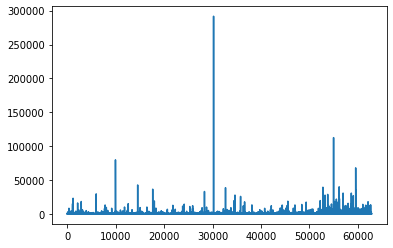

In [ ]:
plt.plot('totalClapCount', data = train4)

In [ ]:
train4 = train4[train4.totalClapCount < 150000]

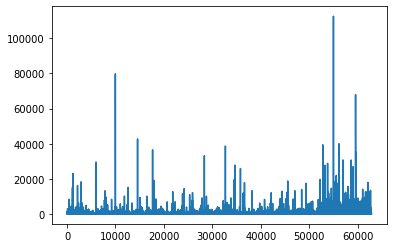

In [ ]:
plt.plot('totalClapCount', data = train4)

In [ ]:
#remove outlier data points, so that the graph will not be too small to see
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    non_outliers = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)
    return df.loc[non_outliers]

In [ ]:
clap2text = {'column_name': 'totalClapCount', 'column_text':'number of Claps'}

In [ ]:
def plot_claps(feature, is_grouped):
    plt.figure(figsize=(15, 6))      
    class_name = clap2text['column_name']
    column = train4[class_name]
    # remove outliers
    train4_in = remove_outliers(train4, class_name)
    train4_in = train4_in.sort_values(by=[class_name], ascending=False).head(int(len(train4_in)))
    temp = train4_in.groupby(pd.cut(train4_in[feature], bins=np.arange(0, 2600, step=200))).mean()[class_name]
    temp.plot.bar()
    plt.title('{} in different {}'.format(clap2text['column_text'], feature))

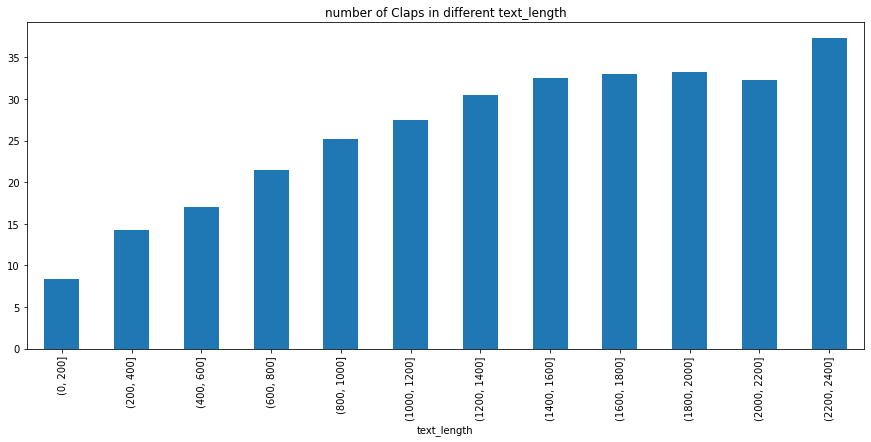

In [ ]:
plot_claps('text_length', True)

From this grapth above, a clear increasing trend of number of claps due by increasing the length of text is shown. While for text longer that 2000, the monoton increasing trend has stopped. Maybe because that there are not so many data points allocating in that area. But the last bar of text length above 2200 words has absolute highes average number of claps. This shows that the longest text has the most claps. So that in the later prediction model, the feature of text_length will be included.

In [ ]:
word_counter = collections.Counter()
tokenizer = WordPunctTokenizer()
#set bag of stopwords in english
stops = set(stopwords.words("english")) 

In [ ]:
#define a combined function that can tokenize sentences into words and then filter out stopwords
def filter_stopwords(data):#data is a string
    tokens = tokenizer.tokenize(data)
    words = [w for w in tokens if w.isalpha()]#taken only words and numeric (not punctuation)
    meaningful_words = [w.lower() for w in words if not w.lower() in stops]#convert to lower class
    return (meaningful_words)# return a list of meaningful words

In [ ]:
for x in test['text']:
    words = filter_stopwords(x)
    for word in words:
      word_counter.update({word:1})

word_counter.most_common(20)

[('data', 2371),
 ('netflix', 1733),
 ('food', 1519),
 ('one', 1426),
 ('time', 1278),
 ('like', 1146),
 ('also', 1110),
 ('use', 1089),
 ('new', 1054),
 ('video', 983),
 ('us', 916),
 ('would', 833),
 ('system', 801),
 ('service', 759),
 ('people', 747),
 ('need', 722),
 ('using', 706),
 ('get', 701),
 ('different', 698),
 ('first', 691)]

In [ ]:
for x in train4['text']:
    words = filter_stopwords(x)
    for word in words:
      word_counter.update({word:1})

word_counter.most_common(20)

[('data', 360287),
 ('ai', 216844),
 ('learning', 176248),
 ('one', 123479),
 ('machine', 116437),
 ('time', 109303),
 ('like', 106503),
 ('use', 97945),
 ('new', 97427),
 ('also', 91181),
 ('model', 89180),
 ('using', 81556),
 ('intelligence', 80013),
 ('would', 73015),
 ('people', 71559),
 ('us', 71005),
 ('need', 68817),
 ('human', 68468),
 ('make', 68402),
 ('technology', 68347)]

As shown above, 'data' appear mostly both in the training data set and in the test data set. Which is a good sign that it will play a good role in the model training and hence very applicable to apply the model to test data. But it can also be observed that in the training data sets, vocabulary of movie, entertainment, video, food appear most frequently. While in the test data sets, the most commen shown words are located in the technology area, such as AI, machine, learning, intelligence. This might be a warning sign that the topics in test data sets probably vary from the data sets used for model training.

### **1.3 Data Preprocessing for Modeling**

In the following part of data preprocessing, text data are firstly tagged, then lemmatized. The URL part of article are removed since it is not meaningful to learn the content of URL link. And meaningless stop words in english are also removed. After this procedure, data are detokenzied back to a data frame for storation reason. Because the structure of tokenized text data cannot be saved and due to the capacity of computer, data after each procedure will be stored to disk. So that these procedures do not need to be done again for each time.Although detokenization is inefficient[4].


In [ ]:
# Lemmatize with POS Tag
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [ ]:
#define a data cleaning function
def clean_text(df):
  lemmatizer = WordNetLemmatizer()
  print('cleaning {} texts'.format(df.shape[0]))
  base = []
  counter = 0
  for x in df:
    x_text = BeautifulSoup(x).get_text()
    words = filter_stopwords(x_text)
    lemma_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]
    base.append(lemma_words)
    if (counter>0 and counter%500==0):
      print('lemmatized {} texts'.format(counter))
    counter += 1
  print('DONE')
  return base

In [ ]:
word_base = clean_text(train4.text)

In [ ]:
#save word_base as pickle form data
with open('/content/drive/My Drive/ADAMS_NLPtask_SS20-2/word_base.pkl','wb') as path_name:
    pickle.dump(word_base, path_name)

In [ ]:
with open('/content/drive/My Drive/ADAMS_NLPtask_SS20-2/word_base.pkl','rb') as path_name:
    word_base = pickle.load(path_name)

In [ ]:
# Check all is well
print(train4.text[1])
print(word_base[1])

In [ ]:
test_base = clean_text(test.text)

In [ ]:
print(test.text[1])
print(test_base[1])

<img class="progressiveMedia-noscript js-progressiveMedia-inner" src="https://cdn-images-1.medium.com/max/1500/1*6BEujBdCk3By8N4AIrWIrQ.png">OnChainNEO’s founders Da HongFei and Erik Zhang founded a company called OnChain. Understanding OnChain is critical to understanding NEO. They’re not the same company, but their interests align and they have a partnership together. OnChain’s system, known as DNA (Decentralized Network Architecture) aims to work with Chinese businesses and government. NEO acts as the foundation of DNA. If OnChain can integrate with Chinese businesses and government, that will greatly spur adoption of NEO.Ultimately, DNA develops public and private blockchains for businesses. These blockchains then link up to NEO to join the decentralized economy. Businesses then have all the benefits of both private and public blockchains. Think of NEO as providing the public blockchains and OnChain’s DNA providing the private blockchains. Then, they can link up and get the best of

In [ ]:
# Undo the tokenization and put the data into a new column in the data frame.
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [ ]:
train4['text_clean'] = [TreebankWordDetokenizer().detokenize(word) for word in word_base]

In [ ]:
train5 = train4.copy()

In [ ]:
train5.drop(['text','Unnamed: 0', 'response'], inplace=True, axis=1)

In [ ]:
train5.head()

,text_length,totalClapCount,text_clean
0,192,100,private business government blockchain major p...
1,533,0,ascent data science sa big data analyst traini...
2,173,50,robot love u well another human discuss michel...
3,1762,27,big data ai iot use case active list interest ...
4,379,1,artificial intelligence next frontier company ...


In [ ]:
test2 = test.copy()
test2['text_clean'] = [TreebankWordDetokenizer().detokenize(word) for word in test_base]

In [ ]:
test2.drop(['text','Unnamed: 0', 'response'], inplace=True, axis=1)

In [ ]:
test2.head()

In [ ]:
# Store data frame to disk
file_name = 'train5_clean.pkl'
train5.to_pickle('/content/drive/My Drive/ADAMS_NLPtask_SS20-2/'+file_name)

In [ ]:
train5.head()

,text_length,totalClapCount,text_clean
0,192,100,private business government blockchain major p...
1,533,0,ascent data science sa big data analyst traini...
2,173,50,robot love u well another human discuss michel...
3,1762,27,big data ai iot use case active list interest ...
4,379,1,artificial intelligence next frontier company ...


In [ ]:
file_name = 'test2_clean.pkl'
test2.to_pickle('/content/drive/My Drive/ADAMS_NLPtask_SS20-2/'+file_name)

## **2. Modeling**

In [ ]:
# Load data frame from disk
file_name = 'train5_clean.pkl'
train5 = pd.read_pickle('/content/drive/My Drive/ADAMS_NLPtask_SS20-2/' + file_name)

In [ ]:
train5.head()

,text_length,totalClapCount,text_clean
0,192,100,private business government blockchain major p...
1,533,0,ascent data science sa big data analyst traini...
2,173,50,robot love u well another human discuss michel...
3,1762,27,big data ai iot use case active list interest ...
4,379,1,artificial intelligence next frontier company ...


In [ ]:
file_name = 'test2_clean.pkl'
test2 = pd.read_pickle('/content/drive/My Drive/ADAMS_NLPtask_SS20-2/'+file_name)

In [ ]:
test2.head()

,index,text_length,text_clean
0,0,3697,one incredible feature cryptocurrencies almost...
1,1,3622,onchainneo founder da hongfei erik zhang found...
2,2,71,want trade cryptocurrency see eye pop return w...
3,5,2986,useful currency medium exchange unit account s...
4,7,810,crypto crypto crypto crypto happen big way fas...


### **2.1 Spliting Training Data**
Before starting the training and the evaluation of the models, we split the dataset into test and training sets. Training data sets have a total of 62822 data points, with 50257 (80%) as training and 12565(20%) as testing points. Partition our data to estimate model performance on a hold-out test set.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#split trainging set and validation set
X_train, X_test, y_train, y_test = train_test_split(train5[['text_clean','text_length']], train5['totalClapCount'], test_size=0.2, random_state=123)

### **2.2 Simple Linear Regression Model**
Before building complex deep learning model, we first use a simple regression model as baseline model, so that later we can compare the improvement in more complicated models. In this part Stochastic Gradient Descent(SGD) model is chosen, because that is very efficient to fit very large data size.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDRegressor

In [ ]:
vect = TfidfVectorizer(input='text_clean')
Xtrain = vect.fit_transform(X_train.text_clean)

In [ ]:
Xtrain.shape

(50257, 181295)

In [ ]:
# train a linear regression model using stochastic gradient descent (SGD)
regr = SGDRegressor()
regr.fit(Xtrain, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
Xtest = vect.transform(X_test.text_clean)
y_hat = regr.predict(Xtest)

In [ ]:
#calculate MSE between y_test and y_hat
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_hat)
print(mse)

1840620.927429358


In the above part of linear regression, we manually leave 20% of training data as validation, and after model prediction we have a loss(mean squared error) of 1840620 as starting point. This will serve as a benchmark for the following deep learning model.

### **2.3 Deep Learning Using Neural Networks**

#### **2.3.1 Processing for Model Training**
Before building models, all text-based data need to be converted into numeric so that the maschine can process. As in section 1.3 raw data have already beed preprocessed so that in this section, tokenization is fairly simple.

In [ ]:
#build vocabulary from local text-based data using keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
NUM_WORDS = 5000  

#create tokenizer object and build vocab from the training set
tokenizer_obj = Tokenizer(NUM_WORDS, oov_token=1)  
tokenizer_obj.fit_on_texts(X_train.text_clean)  

In [ ]:
#convert tokenizer object into sequence of integer values
X_tr_int = tokenizer_obj.texts_to_sequences(X_train.text_clean)

In [ ]:
#define the maximum text length in the training set
max_text_length = max([len(text) for text in X_tr_int])
print('The longest text of the training set has {} words.'.format(max_text_length))

The longest text of the training set has 1771 words.


In [ ]:
#set upper bound of the text length for padding
MAX_TEXT_LENGTH = 1000
X_tr_int_pad = pad_sequences(X_tr_int, MAX_TEXT_LENGTH)

In [ ]:
#do the above 2 steps to test data set
X_ts_int = tokenizer_obj.texts_to_sequences(X_test.text_clean) 
X_ts_int_pad = pad_sequences(X_ts_int, MAX_TEXT_LENGTH)

In [ ]:
# Structure of the prepared training and test data
X_tr_int_pad.shape, y_train.shape, X_ts_int_pad.shape, y_test.shape

((50257, 1000), (50257,), (12565, 1000), (12565,))

After vectorizing already splited training data set, the same procedure is also applied to real test data. So that the contingency of the form and data structure of both two groups of data sets will be kept.

In [ ]:
test_int = tokenizer_obj.texts_to_sequences(test2.text_clean) 
test_int_pad = pad_sequences(test_int, MAX_TEXT_LENGTH)

In [ ]:
test_int_pad.shape

(514, 1000)

#### **2.3.2 Basic GRU Model**

In the GRU model, long sequences are processed. Because in all RNN neural networks they suffer from short time memory problem which means important information in the beginning will gradually lose it's importance and in the end these important information will not bring so much to the model as it should be. But GRU model can learn which information is important and keep it in the model, while throw away the not important ones, which is a perfect fit for training models based on text of natural language. 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, Dropout
from keras.layers.embeddings import Embedding
from keras.initializers import Constant

In [ ]:
#parameter setting of the configuration of deep learning models
NB_HIDDEN = 10
EPOCH = 10
BATCH_SIZE = 128
EMBEDDING_DIM = 50
VAL_SPLIT = 0.2  #fraction of the training set used for validation

In [ ]:
# Embedding layer
embedding_layer=Embedding(input_dim=NUM_WORDS, 
                          output_dim=EMBEDDING_DIM, 
                          input_length=MAX_TEXT_LENGTH
                         )
model1=Sequential()                        
model1.add(embedding_layer)
model1.add(GRU(NB_HIDDEN))
model1.add(Dense(1, activation = 'linear'))
model1.compile(loss="mean_squared_error", optimizer="adam", metrics="mean_squared_error")
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 50)          250000    
_________________________________________________________________
gru_1 (GRU)                  (None, 10)                1860      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 251,871
Trainable params: 251,871
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1_story = model1.fit(X_tr_int_pad, y_train, batch_size=BATCH_SIZE, epochs=EPOCH, validation_split=VAL_SPLIT)

Epoch 1/10
315/315 [==============================] - 165s 524ms/step - loss: 849181.0000 - mean_squared_error: 849181.0000 - val_loss: 771304.1875 - val_mean_squared_error: 771304.1875
Epoch 2/10
315/315 [==============================] - 171s 543ms/step - loss: 848077.2500 - mean_squared_error: 848077.2500 - val_loss: 770482.3750 - val_mean_squared_error: 770482.3750
Epoch 3/10
315/315 [==============================] - 169s 537ms/step - loss: 847330.1875 - mean_squared_error: 847330.1875 - val_loss: 769723.5000 - val_mean_squared_error: 769723.5000
Epoch 4/10
315/315 [==============================] - 171s 544ms/step - loss: 846629.3125 - mean_squared_error: 846629.3125 - val_loss: 769000.2500 - val_mean_squared_error: 769000.2500
Epoch 5/10
315/315 [==============================] - 169s 536ms/step - loss: 845965.4375 - mean_squared_error: 845965.4375 - val_loss: 768340.4375 - val_mean_squared_error: 768340.4375
Epoch 6/10
315/315 [==============================] - 169s 537ms/step 

In model1 we have a validation loss of 765676 with 20% of hold out data. Compared to the simple linear regression model, it is already a significant improvement of 58.4%.

In [ ]:
# Store model to disk
model1.save('/content/drive/My Drive/ADAMS_NLPtask_SS20-2/model1')

INFO:tensorflow:Assets written to: /content/drive/My Drive/ADAMS_NLPtask_SS20-2/model1/assets


#### **2.3.3 Generate Prediction for Submission**

In [ ]:
# Load the model
filepath = '/content/drive/My Drive/ADAMS_NLPtask_SS20-2/model1'
model1 = load_model(filepath, compile = True)

In [ ]:
predict = model1.predict(test_int_pad)

In [ ]:
data = predict.copy()

In [ ]:
df = pd.DataFrame(data=data[0:,0:],
                   index=[i for i in range(data.shape[0])],
                   columns=['f'+str(i) for i in range(data.shape[1])])


In [ ]:
df['f0'] = df['f0'].astype(float)

In [ ]:
df[df < 0] = 0

In [ ]:
tem = pd.read_csv("/content/drive/My Drive/ADAMS_NLPtask_SS20-2/Sample_submission.csv")
tem.head()

,index,Claps
0,0,4708.880317
1,1,4925.785997
2,2,4399.108583
3,5,4091.812227
4,7,3838.688318


In [ ]:
tem.Claps = df.f0

In [ ]:
tem.head()

In [ ]:
tem.to_csv('/content/drive/My Drive/ADAMS_NLPtask_SS20-2/Sample_submission.csv')

## **Reflection**

In this project a deep learning model for text data was developed to predict a sign of popularity: number of claps, for article published on social media. A new feature: length of text was also extracted from the text data and in the explanatory analysis, it has shown a correlation between the number of claps and the text length. \
Compare to our benchmark linear regression model, the deep learning model has shown a significant improvement based on evaluation metrics mean squared error by 58.4%.
For future work, more additional features can be added to the neural network model, such as in the raw data. And additional improvement for modeling could be mixed input model combining both text data and other data form. Another improvement could be detecting a list of 'hit' words and mark our data if it is included.

## **References**
[1] Flavio Henrique de Freitas.(2018).Predicting article retweets and likes based on the title using Machine Learning.Accessed 29 Aug.2020. Available at: https://github.com/flaviohenriquecbc/machine-learning-capstone-project/blob/master/final-report.pdf/. \
[2] Dylan Bray, Hassan Chughtai, Numan Gilani, Simon Xie, Charlie Yeng, and Gui Zamorano.(2019).Predicting the Popularity of Instagram Posts. Accessed 29 Aug.2020. Available at:https://towardsdatascience.com/predicting-the-popularity-of-instagram-posts-deeb7dc27a8f/. \
[3]Michael Phi.(2018).Illustrated Guide to LSTM’s and GRU’s: A step by step explanation.Accessed 29 Aug.2020. Available at: https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21/ \
[4]Stefan Lessmann.(2020).ADAMS Tutorial#11: Sentiment Analysis. Available at:https://github.com/Humboldt-WI/adams/blob/master/exercises/Ex11-sentiment-analysis.ipynb/ \
[5]Mohamed Afham.(2019).Twitter Sentiment Analysis using NLTK, Python.Accessed 29 Aug.2020. Available at:https://towardsdatascience.com/twitter-sentiment-analysis-classification-using-nltk-python-fa912578614c/.